# PURPOSE
* The purpose of this notebook is to conduct one-way ANOVA test and a Post-Hoc test
* Brandon Johnson

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sym
from IPython.display import Math
import pingouin as pg
import pandas as pd

In [46]:
N = 30
x1 = np.random.normal(2800,33,size=N)
x2 = np.random.normal(2850,20,size=N)
x3 = np.random.normal(2820,5,size=N)
cond_1 = [1]*N
cond_2 = [2]*N
cond_3 = [3]*N

X = np.column_stack((np.round(np.hstack((x1,x2,x3)),2),np.hstack((cond_1,cond_2,cond_3))))

display(Math('X = '+sym.latex(sym.sympify(X.reshape(15,12)))))

for i,x in enumerate([x1,x2,x3]):
    print(f'Condition {i+1}: Mean: {x.mean():,.2f}, SD: {x.std(ddof=1):.2f}')

<IPython.core.display.Math object>

Condition 1: Mean: 2,795.98, SD: 29.17
Condition 2: Mean: 2,849.04, SD: 20.90
Condition 3: Mean: 2,820.32, SD: 5.82


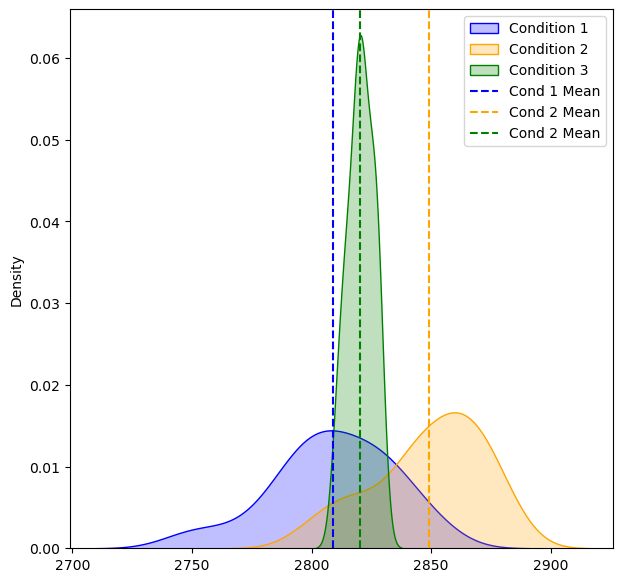

In [40]:
plt.figure(figsize=(7,7))
sns.kdeplot(x=X[:31,0],fill=True,label='Condition 1',color='blue')
sns.kdeplot(x=X[31:61,0],fill=True,label='Condition 2',color='orange')
sns.kdeplot(x=X[61:,0],fill=True,label='Condition 3',color='green')
plt.axvline(X[:31,0].mean(),ls='--',label='Cond 1 Mean',color='blue')
plt.axvline(X[31:61,0].mean(),ls='--',label='Cond 2 Mean',color='orange')
plt.axvline(X[61:,0].mean(),ls='--',label='Cond 2 Mean',color='green')
plt.legend()
plt.show()

In [70]:
pd.options.display.max_rows = None
df = pd.DataFrame(X, columns=['Speed','Condition'])

df.sample(10)

,Speed,Condition
45,2862.22,2.0
37,2883.52,2.0
85,2820.13,3.0
71,2809.56,3.0
55,2868.72,2.0
75,2826.10,3.0
30,2846.85,2.0
16,2800.87,1.0
67,2818.94,3.0
48,2870.37,2.0


In [57]:
pd.DataFrame(np.round(np.column_stack((x1,x2,x3)),2),columns=['Cond_1','Cond_2','Cond_3']).head(10)

,Cond_1,Cond_2,Cond_3
0,2799.05,2846.85,2826.76
1,2794.30,2828.32,2819.43
2,2814.12,2820.17,2815.18
3,2755.43,2871.50,2829.60
4,2811.96,2859.24,2817.47
5,2777.43,2837.32,2812.47
6,2849.61,2854.27,2824.35
7,2849.30,2883.52,2818.94
8,2767.65,2845.01,2818.05
9,2825.57,2857.90,2829.88


### One-way ANOVA

In [67]:
pg.anova(data=df, dv='Speed', between='Condition')

,Source,ddof1,ddof2,F,p-unc,np2
0,Condition,2,87,48.038885,8.799100e-15,0.524792


### Post-Hoc

In [68]:
pg.pairwise_gameshowell(data=df, dv='Speed', between='Condition')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1.0,2.0,2795.975000,2849.041667,-53.066667,6.552573,-8.098600,52.565558,2.468814e-10,-2.063893
1,1.0,3.0,2795.975000,2820.325667,-24.350667,5.431324,-4.483375,31.303324,2.653664e-04,-1.142569
2,2.0,3.0,2849.041667,2820.325667,28.716000,3.961545,7.248687,33.466761,7.057852e-08,1.847296


In [69]:
pg.pairwise_tukey(data=df, dv='Speed', between='Condition')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1.0,2.0,2795.975000,2849.041667,-53.066667,5.420004,-9.790891,3.363976e-14,-2.063893
1,1.0,3.0,2795.975000,2820.325667,-24.350667,5.420004,-4.492740,6.349182e-05,-1.142569
2,2.0,3.0,2849.041667,2820.325667,28.716000,5.420004,5.298151,2.596899e-06,1.847296
